In [6]:
from env import simGym
from ppo_network import PolicyNetwork
from ppo import Agent
import numpy as np
from data import Trajectory, Buffer

In [2]:
n_actions = 1
n_states = 2
n_steps = 200  # steps for per episode
n_episodes = 10
n_steps_per_learn = n_episodes * n_steps
pn = Agent(n_states, 
                 n_actions, 
                 n_steps, 
                 n_episodes)
# pn = PolicyNetwork(n_states, 
#                  n_actions, 
#                  n_steps, 
#                  n_steps_per_learn)
t = Trajectory()
buffer = Buffer(n_states, n_actions, n_episodes, n_steps)

In [3]:
sim = simGym()
observation, info = sim.reset()
training_times = 500
reward_list = []
for times in range(training_times):
    buffer.reset()
    for i in range(n_episodes):
        t.reset()
        for _ in range(n_steps):
            # actions = pn.infer(state=observation, noise=True)
            actions = pn.get_action(observation)
            observation, reward, terminated, truncated, info = sim.step(actions)
            if terminated or truncated:
                observation, info = sim.reset()
            t.add(observation, actions, reward)
        observation, info = sim.reset()
        buffer.add(t)
    print(times, np.mean(buffer.rewards))
    reward_list.append(np.mean(buffer.rewards))
    pn.learn_from_episodes(buffer)


0 -5.872019866403311
1 -5.246543978828862
2 -5.51375385280668
3 -6.713325153778586
4 -6.533930099935285
5 -6.582166786804634
6 -7.071042804778076
7 -5.3011040643294125
8 -6.87973766719408
9 -7.8853113541942665
10 -6.448110550456327
11 -6.007204620728607
12 -6.167592020723856
13 -5.481702690713463
14 -5.847431519826105
15 -6.77113496592904
16 -5.86071493253329
17 -5.62036375894119
18 -6.576657955562971
19 -6.0099171141012215
20 -6.201898728697142
21 -6.499825786728426
22 -5.663381595018048
23 -6.015564237025048
24 -6.107230695995085
25 -6.0924289101412175
26 -6.44563086576762
27 -6.9475956763398194
28 -6.753902680075253
29 -6.46968734869181
30 -6.885386492934389
31 -6.926199269009981
32 -6.757078736926813
33 -6.8273020453551245
34 -6.680608044367744
35 -6.527403528284912
36 -6.519309644788993
37 -6.196888085014583
38 -6.3524719230185775
39 -6.487273650472813
40 -7.12154360448814
41 -6.882791749169077
42 -6.8101905157515175
43 -7.012217836591622
44 -7.203884697631903
45 -6.86450643851189

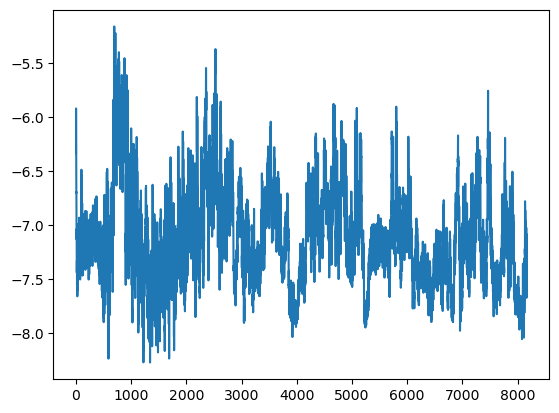

In [4]:
import matplotlib.pyplot as plt
plt.plot(reward_list)

In [15]:
sim = simGym(render_mode=True)
observation, info = sim.reset()
for _ in range(200):
            actions = pn.infer(state=observation, noise=None)
            observation, reward, terminated, truncated, info = sim.step(actions)
            print(actions, observation, reward)
            if terminated or truncated:
                observation, info = sim.reset()

[-9.166407] [ 0.98470384  0.17423645 -1.0508218 ] -0.13990255445104227
[-8.896402] [ 0.9935092   0.11375218 -1.2226273 ] -0.1450932634364402
[-8.634615] [ 0.99911594  0.04203983 -1.4389342 ] -0.16647751198632607
[-8.3858795] [ 0.99906063 -0.04333436 -1.7080033 ] -0.2128215381420448
[-8.154681] [ 0.9894564 -0.1448311 -2.0398867] -0.2976065847160328
[-7.9910398] [ 0.9643912 -0.2644799 -2.4464462] -0.4412381088580465
[-8.0288515] [ 0.91523063 -0.4029304  -2.9410372 ] -0.6741541658413366
[-8.408457] [ 0.8300544 -0.5576824 -3.5374932] -1.0409596774736067
[-9.208405] [ 0.69384503 -0.7201243  -4.247808  ] -1.6053658454925317
[-10.1879635] [ 0.4907348 -0.871309  -5.0776396] -2.4547735734407605
[-10.721592] [ 0.2104132  -0.97761256 -6.0187054 ] -3.701317449050637
[-10.40756] [-0.13944566 -0.9902297  -7.0379834 ] -5.472815132715168
[-10.27535] [-0.51405156 -0.8577593  -8.        ] -7.883808590945172
[-11.350852] [-0.80750006 -0.5898675  -8.        ] -10.859045652635064
[-11.419025] [-0.97346205 